In [1]:
import pandas as pd
import random
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         '../data/raw/yellow_tripdata_2015-12.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,1,N,-73.966309,40.763088,1,5.5,0.5,0.5,1.00,0.0,0.3,7.80
1,2,2015-12-01 00:00:47,2015-12-01 00:12:34,1,5.49,-73.942368,40.832970,1,N,-73.989220,40.773918,2,17.0,0.5,0.5,0.00,0.0,0.3,18.30
2,1,2015-12-01 00:00:50,2015-12-01 00:02:57,1,0.40,-73.982895,40.739662,1,N,-73.986649,40.734097,1,3.5,0.5,0.5,0.95,0.0,0.3,5.75
3,1,2015-12-04 19:09:14,2015-12-04 19:11:16,1,0.20,-73.981255,40.764538,1,N,-73.984016,40.761917,2,3.5,1.0,0.5,0.00,0.0,0.3,5.30
4,1,2015-12-04 19:09:45,2015-12-04 19:25:08,4,1.70,-74.004501,40.741898,1,N,-73.983543,40.744278,2,11.0,1.0,0.5,0.00,0.0,0.3,12.80


In [9]:
# del df['VendorID']
# del df['RatecodeID']
# del df['store_and_fwd_flag']
# del df['payment_type']
# del df['mta_tax']
# del df['extra']
del df['tip_amount']
del df['tolls_amount']
del df['improvement_surcharge']
del df['total_amount']

In [10]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
0,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,-73.966309,40.763088,5.5
1,2015-12-01 00:00:47,2015-12-01 00:12:34,1,5.49,-73.942368,40.832970,-73.989220,40.773918,17.0
2,2015-12-01 00:00:50,2015-12-01 00:02:57,1,0.40,-73.982895,40.739662,-73.986649,40.734097,3.5
3,2015-12-04 19:09:14,2015-12-04 19:11:16,1,0.20,-73.981255,40.764538,-73.984016,40.761917,3.5
4,2015-12-04 19:09:45,2015-12-04 19:25:08,4,1.70,-74.004501,40.741898,-73.983543,40.744278,11.0


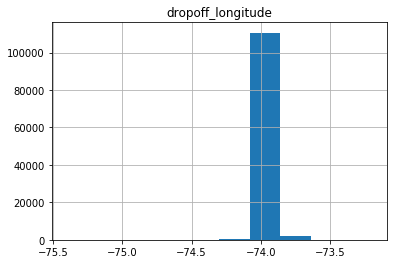

In [20]:
df.hist('dropoff_longitude');

In [26]:
df['trip_time'] = (pd.to_datetime(df.tpep_dropoff_datetime)-pd.to_datetime(df.tpep_pickup_datetime)).astype('timedelta64[s]')
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,trip_time
0,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,-73.966309,40.763088,5.5,316.0
1,2015-12-01 00:00:47,2015-12-01 00:12:34,1,5.49,-73.942368,40.832970,-73.989220,40.773918,17.0,707.0
2,2015-12-01 00:00:50,2015-12-01 00:02:57,1,0.40,-73.982895,40.739662,-73.986649,40.734097,3.5,127.0
3,2015-12-04 19:09:14,2015-12-04 19:11:16,1,0.20,-73.981255,40.764538,-73.984016,40.761917,3.5,122.0
4,2015-12-04 19:09:45,2015-12-04 19:25:08,4,1.70,-74.004501,40.741898,-73.983543,40.744278,11.0,923.0


In [27]:
df.to_csv('../data/raw/yellow_tripdata_2015-12-sample.csv')